# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.visual import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import LEG_CONTAMINATION_LEV
from utils.config import DEFAULT_LITHO_LEXICON, DEFAULT_LITHO_LEGEND, DEFAULT_POL_LEXICON
from utils.io import dataframe_viewer
from utils.orm import boreholes_from_dataframe
from utils.visual import legend_from_attributes
from core.project import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
save_dir = ROOT_DIR+'/CF_data/Donnees_fusionnees/final_data/'

In [3]:
df = pd.read_csv(save_dir+'Final_dataset.csv', sep=',')

In [4]:
dataframe_viewer(df, rows=5, un_val='ID')

Rows : 112, columns : 131, Unique values on col 'ID': 46


interactive(children=(IntSlider(value=5, description='rows', max=112, min=5, readout=False), IntSlider(value=1…

## Data Checking

In [5]:
df.rename({'Ech_base':'Base_intv', 'Ech_top':'Top_intv', 'Ep_litho':'Epais_intv', 'Description':'Lithology'}
          , axis='columns', inplace=True)

In [6]:
df['Epais_intv'] = df['Base_intv'] - df['Top_intv']

In [7]:
df['Diam_for'] = df['Diam_for']/1000
df.insert(list(df.columns).index('Long_for')+1, 'Diam_for', df.pop('Diam_for'))

In [8]:
dataframe_viewer(df, rows=3, un_val='ID_ech')

Rows : 112, columns : 132, Unique values on col 'ID_ech': 112


interactive(children=(IntSlider(value=3, description='rows', max=112, min=3, readout=False), IntSlider(value=1…

## Create Boreholes from dataframes

In [9]:
boreholes, components, link_intv_comp = boreholes_from_dataframe(df, verbose=False,
                                                attributes=['Lithology'], average_z=102,
                                                symbols={'lithology':{'lexicon':DEFAULT_LITHO_LEXICON}}, 
                                                diameter='Diam_for', thickness='Epais_intv')


Dataframe processing...

|__ID:'201'
Remblais avec briques de construction couleur orange, gris, verdâtre   
 {'lithology': 'remblais'}
Remblais avec briques de construction couleur orange, gris, verdâtre   
 {'lithology': 'remblais'}
Summary : dict_values([Striplog(2 Intervals, start=0.0, stop=0.8999999999999999)])

|__ID:'205'
Couche de boue en surface liée à l'intervention de Géosonda 
 {'lithology': 'boue'}
Couche de boue en surface liée à l'intervention de Géosonda 
 {'lithology': 'boue'}
Couche de boue en surface liée à l'intervention de Géosonda 
 {'lithology': 'boue'}
Couche de boue en surface liée à l'intervention de Géosonda 
 {'lithology': 'boue'}
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.5)])

|__ID:'208'
Remblais de couleur brun avec déchets de construction - matrice sableuse et gravillonneuse 
 {'lithology': 'remblais'}
Remblais de couleur brun avec déchets de construction - matrice sableuse et gravillonneuse 
 {'lithology': 'remblais'}
Remblais de c

/home/yanathan/Projects/GSDMA/utils/orm.py:121: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="components"' to the 'ComponentOrm.intervals' relationship.
  boreholes_orm.append(BoreholeOrm(id=bh_name, date=bh_date))
/home/yanathan/Projects/GSDMA/utils/orm.py:121: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.intv_id, which conflic

 {'lithology': 'schistes'}
Matériaux gravillonneux noirs saturés gras - présence de schistes et scories - légère odeur vers 2 m dans strate saturée  
 {'lithology': 'schistes'}
Matériaux gravillonneux noirs saturés gras - présence de schistes et scories - légère odeur vers 2 m dans strate saturée  
 {'lithology': 'schistes'}
Idem - Remblais gravillonneux avec scories saturés - interface remblais/sol en place  
 {'lithology': 'remblais'}
Summary : dict_values([Striplog(6 Intervals, start=0.0, stop=2.6999999999999993)])

|__ID:'226'
Remblais de couleur noir avec présence de brique  
 {'lithology': 'remblais'}
Remblais de couleur noir avec présence de brique  
 {'lithology': 'remblais'}
Remblais de couleur noir avec présence de brique  
 {'lithology': 'remblais'}
Remblais de couleur noir avec présence de brique  
 {'lithology': 'remblais'}
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.6)])

|__ID:'50'
Remblais jaune sableux  
 {'lithology': 'remblais'}
Remblais jaune sabl

|__ID:'F24b'
Remblais 
 {'lithology': 'remblais'}
Summary : dict_values([Striplog(1 Intervals, start=0.0, stop=0.5)])
No diameter value found, using default: 0.1

|__ID:'F25'
Remblais 
 {'lithology': 'remblais'}
Remblais 
 {'lithology': 'remblais'}
Limons et sables 
 {'lithology': 'limons'}
Summary : dict_values([Striplog(3 Intervals, start=0.0, stop=1.5)])
No diameter value found, using default: 0.1

|__ID:'F26'
Remblais 
 {'lithology': 'remblais'}
Remblais 
 {'lithology': 'remblais'}
Limons et argiles 
 {'lithology': 'limons'}
Limons et sables 
 {'lithology': 'limons'}
Summary : dict_values([Striplog(4 Intervals, start=0.0, stop=1.8000000000000005)])
No diameter value found, using default: 0.1

|__ID:'F27a'
Remblais 
 {'lithology': 'remblais'}
Summary : dict_values([Striplog(1 Intervals, start=0.0, stop=0.5)])
No diameter value found, using default: 0.1

|__ID:'F27d'
Remblais 
 {'lithology': 'remblais'}
Limons et sables 
 {'lithology': 'limons'}
Summary : dict_values([Striplog(2 Inte

In [10]:
len(boreholes), len(components)

(46, 8)

In [11]:
for b in boreholes:
    for k, v in b.intervals.items():
        print({b.id:[v.interval_number, v.top.middle, v.base.middle, b.intervals_values[k]]})

{'201': [0, 101.926886, 101.426886, '{"lithology": "remblais"}']}
{'201': [1, 101.426886, 101.02688599999999, '{"lithology": "remblais"}']}
{'205': [0, 101.804167, 101.404167, '{"lithology": "boue"}']}
{'205': [1, 101.404167, 100.904167, '{"lithology": "boue"}']}
{'205': [2, 100.904167, 100.70416700000001, '{"lithology": "boue"}']}
{'205': [3, 100.70416700000001, 100.304167, '{"lithology": "boue"}']}
{'208': [0, 101.847697, 101.347697, '{"lithology": "remblais"}']}
{'208': [1, 101.347697, 101.047697, '{"lithology": "remblais"}']}
{'208': [2, 101.047697, 100.647697, '{"lithology": "remblais"}']}
{'208': [3, 100.647697, 100.347697, '{"lithology": "remblais"}']}
{'207': [0, 101.889132, 101.489132, '{"lithology": "remblais"}']}
{'207': [1, 101.489132, 101.089132, '{"lithology": "remblais"}']}
{'207': [2, 101.089132, 100.689132, '{"lithology": "remblais"}']}
{'207': [3, 100.689132, 100.489132, '{"lithology": "remblais"}']}
{'207': [4, 100.489132, 100.089132, '{"lithology": "remblais"}']}
{'

## Create a dictionary containing legends for each representation attribute

In [12]:
legend_dict = legend_from_attributes([('lithology', DEFAULT_LITHO_LEGEND)])

## Create a project and save data in a database

In [13]:
DB_name = 'tmp_files/real_orm_db.db'

if os.path.exists(DB_name):
    os.remove(DB_name)

engine = create_engine(f"sqlite:///{DB_name}", echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-10-17 11:28:53,143 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:53,146 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-10-17 11:28:53,147 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-17 11:28:53,148 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-10-17 11:28:53,149 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-17 11:28:53,150 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Samples")
2021-10-17 11:28:53,151 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-17 11:28:53,152 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Samples")
2021-10-17 11:28:53,153 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-17 11:28:53,154 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-10-17 11:28:53,155 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-10-17 11:28:53,156 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-10-17 11:28:53,156 INFO sqlalchemy.engine.Engine [raw

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

#### Set project's legend dictionary

In [16]:
p = Project(session, legend_dict=legend_dict, lexicon=DEFAULT_LITHO_LEXICON)

2021-10-17 11:28:53,243 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:53,247 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:53,248 INFO sqlalchemy.engine.Engine [generated in 0.00136s] ()


#### Add components, boreholes into the project

In [17]:
p.add_components(components)

2021-10-17 11:28:53,258 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-10-17 11:28:53,259 INFO sqlalchemy.engine.Engine [generated in 0.00155s] ((0, 'Remblais'), (1, 'Boue'), (2, '_'), (3, 'Schistes'), (4, 'Limon'), (5, 'Limons'), (6, 'Béton'), (7, 'Alluvions'))
2021-10-17 11:28:53,261 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  0
2021-10-17 11:28:53,265 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:53,266 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:53,267 INFO sqlalchemy.engine.Engine [cached since 0.02062s ago] ()


In [18]:
for bh in boreholes:
    p.add_borehole(bh)

2021-10-17 11:28:53,275 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-17 11:28:53,277 INFO sqlalchemy.engine.Engine [generated in 0.00163s] ('201', None, 0.8999999999999999, 0.075)
2021-10-17 11:28:53,279 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:53,280 INFO sqlalchemy.engine.Engine [generated in 0.00074s] ((0, 101.926886, 101.926886, 101.926886, 152890.245758, 122596.47426), (1, 101.426886, 101.426886, 101.426886, 152890.245758, 122596.47426), (2, 101.426886, 101.426886, 101.426886, 152890.245758, 122596.47426), (3, 101.02688599999999, 101.02688599999999, 101.02688599999999, 152890.245758, 122596.47426))
2021-10-17 11:28:53,282 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-17 11:28:53,282 INFO sqlalchemy.engine.Engine [g

2021-10-17 11:28:53,360 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:53,360 INFO sqlalchemy.engine.Engine [cached since 0.05632s ago] (8,)
2021-10-17 11:28:53,362 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:53,363 INFO sqlalchemy.engine.Engine [cached since 0.05368s ago] (9,)
2021-10-17 11:28:53,365 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-10-17 11:28:53,440 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:53,441 INFO sqlalchemy.engine.Engine [cached since 0.1617s ago] ((20, 101.889132, 101.889132, 101.889132, 152892.92499700002, 122592.662277), (21, 101.489132, 101.489132, 101.489132, 152892.92499700002, 122592.662277), (22, 101.489132, 101.489132, 101.489132, 152892.92499700002, 122592.662277), (23, 101.089132, 101.089132, 101.089132, 152892.92499700002, 122592.662277), (24, 101.089132, 101.089132, 101.089132, 152892.92499700002, 122592.662277), (25, 100.689132, 100.689132, 100.689132, 152892.92499700002, 122592.662277), (26, 100.689132, 100.689132, 100.689132, 152892.92499700002, 122592.662277), (27, 100.489132, 100.489132, 100.489132, 152892.92499700002, 122592.662277), (28, 100.489132, 100.489132, 100.489132, 152892.92499700002, 122592.662277), (29, 100.089132, 100.089132, 100.089132, 152892.92499700002, 122592.662277))
2021-10-17 

2021-10-17 11:28:53,502 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  4
2021-10-17 11:28:53,505 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:53,506 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:53,507 INFO sqlalchemy.engine.Engine [cached since 0.2605s ago] ()
2021-10-17 11:28:53,509 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-10-17 11:28:53,510 INFO sqlalchemy.engine.Engine [cached since 0.2128s ago] ('2

2021-10-17 11:28:53,563 INFO sqlalchemy.engine.Engine [cached since 0.2592s ago] (40,)
2021-10-17 11:28:53,565 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:53,565 INFO sqlalchemy.engine.Engine [cached since 0.256s ago] (41,)
2021-10-17 11:28:53,567 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:53,568 INFO sqlalchemy.engine.Engine [cached since 0.2637s ago] (42,)
2021-10-17 11:28:53,570 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-10-17 11:28:53,625 INFO sqlalchemy.engine.Engine [cached since 0.3161s ago] (53,)
Borehole geometry created successfully !
2021-10-17 11:28:53,637 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:53,638 INFO sqlalchemy.engine.Engine [cached since 0.31s ago] (101.315009, '217')
2021-10-17 11:28:53,639 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-17 11:28:53,639 INFO sqlalchemy.engine.Engine [cached since 0.3642s ago] ('221', None, 0.4, 0.075)
2021-10-17 11:28:53,641 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:53,641 INFO sqlalchemy.engine.Engine [cached since 0.3624s ago] ((54, 101.798666, 101.798666, 101.798666, 152882.412821, 122584.570092), (55, 101.39866599999999, 101.39866599999999, 101.39866599999999, 152882.412821, 122584.570092))
2021-10-17 11:28:53,643 INFO sqlalchemy.e

2021-10-17 11:28:53,717 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  9
2021-10-17 11:28:53,721 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:53,722 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:53,722 INFO sqlalchemy.engine.Engine [cached since 0.4755s ago] ()
2021-10-17 11:28:53,725 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-10-17 11:28:53,725 INFO sqlalchemy.engine.Engine [cached since 0.4281s ago] ('?

2021-10-17 11:28:53,810 INFO sqlalchemy.engine.Engine [cached since 0.5345s ago] ('225', None, 2.6999999999999993, 0.075)
2021-10-17 11:28:53,811 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:53,813 INFO sqlalchemy.engine.Engine [cached since 0.5344s ago] ((66, 101.669021, 101.669021, 101.669021, 152881.112067, 122580.961648), (67, 101.269021, 101.269021, 101.269021, 152881.112067, 122580.961648), (68, 101.269021, 101.269021, 101.269021, 152881.112067, 122580.961648), (69, 100.769021, 100.769021, 100.769021, 152881.112067, 122580.961648), (70, 100.769021, 100.769021, 100.769021, 152881.112067, 122580.961648), (71, 100.369021, 100.369021, 100.369021, 152881.112067, 122580.961648), (72, 100.369021, 100.369021, 100.369021, 152881.112067, 122580.961648), (73, 99.969021, 99.969021, 99.969021, 152881.112067, 122580.961648)  ... displaying 10 of 12 total bound parameter sets ...  (76, 99.469021, 99.469021, 99.

2021-10-17 11:28:53,878 INFO sqlalchemy.engine.Engine [cached since 0.5987s ago] ((78, 101.823793, 101.823793, 101.823793, 152882.734621, 122586.45168), (79, 101.42379299999999, 101.42379299999999, 101.42379299999999, 152882.734621, 122586.45168), (80, 101.42379299999999, 101.42379299999999, 101.42379299999999, 152882.734621, 122586.45168), (81, 101.12379299999999, 101.12379299999999, 101.12379299999999, 152882.734621, 122586.45168), (82, 101.12379299999999, 101.12379299999999, 101.12379299999999, 152882.734621, 122586.45168), (83, 100.723793, 100.723793, 100.723793, 152882.734621, 122586.45168), (84, 100.723793, 100.723793, 100.723793, 152882.734621, 122586.45168), (85, 100.223793, 100.223793, 100.223793, 152882.734621, 122586.45168))
2021-10-17 11:28:53,880 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-17 11:28:53,880 INFO sqlalchemy.engine.Engine [cached since 0.5985s 

2021-10-17 11:28:53,952 INFO sqlalchemy.engine.Engine [cached since 0.648s ago] (86,)
2021-10-17 11:28:53,954 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:53,955 INFO sqlalchemy.engine.Engine [cached since 0.6456s ago] (87,)
2021-10-17 11:28:53,957 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:53,958 INFO sqlalchemy.engine.Engine [cached since 0.6538s ago] (88,)
2021-10-17 11:28:53,960 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-10-17 11:28:54,035 INFO sqlalchemy.engine.Engine [cached since 0.7528s ago] ((49, '52', 0, '{"lithology": "remblais"}', 98, 99, None), (50, '52', 1, '{"lithology": "remblais"}', 100, 101, None), (51, '52', 2, '{"lithology": "remblais"}', 102, 103, None))
2021-10-17 11:28:54,036 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  16
2021-10-17 11:28:54,041 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:54,041 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:54,042 INFO sqlalchemy.engine.Engine [cached since 0.7953s ago] ()
2021-10-17 11:28:54,045 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "I

2021-10-17 11:28:54,119 INFO sqlalchemy.engine.Engine [cached since 0.8395s ago] ((108, 102.0, 102.0, 102.0, 152891.679, 122591.278), (109, 101.5, 101.5, 101.5, 152891.679, 122591.278), (110, 101.5, 101.5, 101.5, 152891.679, 122591.278), (111, 101.2, 101.2, 101.2, 152891.679, 122591.278))
2021-10-17 11:28:54,120 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-17 11:28:54,121 INFO sqlalchemy.engine.Engine [cached since 0.8391s ago] ((54, '303', 0, '{"lithology": "remblais"}', 108, 109, None), (55, '303', 1, '{"lithology": "remblais"}', 110, 111, None))
2021-10-17 11:28:54,122 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  18
2021-10-17 11:28:54,126 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:54,126 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes

2021-10-17 11:28:54,201 INFO sqlalchemy.engine.Engine [cached since 0.904s ago] ('305',)
2021-10-17 11:28:54,203 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,204 INFO sqlalchemy.engine.Engine [cached since 0.8997s ago] (114,)
2021-10-17 11:28:54,206 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,206 INFO sqlalchemy.engine.Engine [cached since 0.8968s ago] (115,)
Borehole geometry created successfully !
2021-10-17 11:28:54,216 INFO sqlalchemy.engine

2021-10-17 11:28:54,274 INFO sqlalchemy.engine.Engine [cached since 0.9642s ago] (121,)
2021-10-17 11:28:54,275 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,276 INFO sqlalchemy.engine.Engine [cached since 0.9716s ago] (122,)
2021-10-17 11:28:54,277 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,278 INFO sqlalchemy.engine.Engine [cached since 0.9687s ago] (123,)
2021-10-17 11:28:54,281 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-10-17 11:28:54,366 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:54,367 INFO sqlalchemy.engine.Engine [cached since 1.088s ago] ((130, 102.8, 102.8, 102.8, 152897.31, 122614.98), (131, 102.3, 102.3, 102.3, 152897.31, 122614.98), (132, 102.3, 102.3, 102.3, 152897.31, 122614.98), (133, 101.8, 101.8, 101.8, 152897.31, 122614.98), (134, 101.8, 101.8, 101.8, 152897.31, 122614.98), (135, 100.89999999999999, 100.89999999999999, 100.89999999999999, 152897.31, 122614.98))
2021-10-17 11:28:54,369 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-17 11:28:54,370 INFO sqlalchemy.engine.Engine [cached since 1.088s ago] ((65, 'F2M', 0, '{"lithology": "remblais"}', 130, 131, None), (66, 'F2M', 1, '{"lithology": "limons"}', 132, 133, None), (67, 'F2M', 2, '{"lithology": "limons"}', 134, 135, None))
2021-

2021-10-17 11:28:54,440 INFO sqlalchemy.engine.Engine [cached since 1.13s ago] (139,)
Borehole geometry created successfully !
2021-10-17 11:28:54,452 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:54,452 INFO sqlalchemy.engine.Engine [cached since 1.125s ago] (101.47, 'F3M')
2021-10-17 11:28:54,454 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-17 11:28:54,454 INFO sqlalchemy.engine.Engine [cached since 1.179s ago] ('F4M', None, 0.7000000000000002, 0.1)
2021-10-17 11:28:54,456 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:54,457 INFO sqlalchemy.engine.Engine [cached since 1.178s ago] ((140, 102.59, 102.59, 102.59, 152893.32, 122592.1), (141, 101.89, 101.89, 101.89, 152893.32, 122592.1))
2021-10-17 11:28:54,458 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, inter

2021-10-17 11:28:54,521 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,522 INFO sqlalchemy.engine.Engine [cached since 1.218s ago] (148,)
2021-10-17 11:28:54,524 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,525 INFO sqlalchemy.engine.Engine [cached since 1.215s ago] (149,)
Borehole geometry created successfully !
2021-10-17 11:28:54,537 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:54,538 IN

2021-10-17 11:28:54,605 INFO sqlalchemy.engine.Engine [cached since 1.308s ago] ('F12M',)
2021-10-17 11:28:54,607 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,607 INFO sqlalchemy.engine.Engine [cached since 1.303s ago] (156,)
2021-10-17 11:28:54,609 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,610 INFO sqlalchemy.engine.Engine [cached since 1.301s ago] (157,)
2021-10-17 11:28:54,612 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-10-17 11:28:54,686 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-10-17 11:28:54,687 INFO sqlalchemy.engine.Engine [cached since 1.044s ago] (84, 'F14M', 0, '{"lithology": "remblais"}', 168, 169, None)
2021-10-17 11:28:54,688 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  32
2021-10-17 11:28:54,692 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:54,694 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:54,694 INFO sqlalchemy.engine.Engine [cached since 1.447s ago] ()
2021-10-17 11:28:54,697 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_numbe

2021-10-17 11:28:54,767 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  34
2021-10-17 11:28:54,771 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:54,772 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:54,773 INFO sqlalchemy.engine.Engine [cached since 1.526s ago] ()
2021-10-17 11:28:54,775 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-10-17 11:28:54,776 INFO sqlalchemy.engine.Engine [cached since 1.479s ago] ('F1

2021-10-17 11:28:54,852 INFO sqlalchemy.engine.Engine [cached since 1.548s ago] (182,)
2021-10-17 11:28:54,853 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:54,854 INFO sqlalchemy.engine.Engine [cached since 1.545s ago] (183,)
Borehole geometry created successfully !
2021-10-17 11:28:54,864 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:54,864 INFO sqlalchemy.engine.Engine [cached since 1.537s ago] (102.546, 'F18c')
2021-10-17 11:28:54,866 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-17 11:28:54,866 INFO sqlalchemy.engine.Engine [cached since 1.591s ago] ('F20', None, 0.9000000000000004, 0.1)
2021-1

2021-10-17 11:28:54,934 INFO sqlalchemy.engine.Engine [cached since 1.624s ago] (191,)
Borehole geometry created successfully !
2021-10-17 11:28:54,943 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:54,944 INFO sqlalchemy.engine.Engine [cached since 1.617s ago] (102.015, 'F21')
2021-10-17 11:28:54,945 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-17 11:28:54,946 INFO sqlalchemy.engine.Engine [cached since 1.671s ago] ('F22', None, 1.4, 0.1)
2021-10-17 11:28:54,948 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:54,948 INFO sqlalchemy.engine.Engine [cached since 1.669s ago] ((192, 102.349, 102.349, 102.349, 152881.59, 122578.837), (193, 101.849, 101.849, 101.849, 152881.59, 122578.837), (194, 101.849, 101.849, 101.849, 152881.59, 122578.837), (195, 101.449, 101.449, 101.449, 152881.59, 

2021-10-17 11:28:55,020 INFO sqlalchemy.engine.Engine [cached since 1.716s ago] (200,)
2021-10-17 11:28:55,021 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:55,022 INFO sqlalchemy.engine.Engine [cached since 1.713s ago] (201,)
Borehole geometry created successfully !
2021-10-17 11:28:55,035 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:55,036 INFO sqlalchemy.engine.Engine [cached since 1.708s ago] (101.629, 'F23')
2021-10-17 11:28:55,037 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-17 11:28:55,038 INFO sqlalchemy.engine.Engine [cached since 1.763s ago] ('F24b', None, 0.5, 0.1)
2021-10-17 11:28:55,0

2021-10-17 11:28:55,109 INFO sqlalchemy.engine.Engine [cached since 1.8s ago] (209,)
Borehole geometry created successfully !
2021-10-17 11:28:55,122 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:55,122 INFO sqlalchemy.engine.Engine [cached since 1.795s ago] (101.869, 'F25')
2021-10-17 11:28:55,124 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-10-17 11:28:55,125 INFO sqlalchemy.engine.Engine [cached since 1.849s ago] ('F26', None, 1.8000000000000005, 0.1)
2021-10-17 11:28:55,126 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-10-17 11:28:55,127 INFO sqlalchemy.engine.Engine [cached since 1.848s ago] ((210, 102.591, 102.591, 102.591, 152875.9, 122586.147), (211, 102.19099999999999, 102.19099999999999, 102.19099999999999, 152875.9, 122586.147), (212, 102.19099999999999, 102.19099999999999, 102.1909999

2021-10-17 11:28:55,192 INFO sqlalchemy.engine.Engine [cached since 1.895s ago] ('F27a',)
2021-10-17 11:28:55,195 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:55,196 INFO sqlalchemy.engine.Engine [cached since 1.892s ago] (218,)
2021-10-17 11:28:55,197 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-10-17 11:28:55,198 INFO sqlalchemy.engine.Engine [cached since 1.889s ago] (219,)
Borehole geometry created successfully !
2021-10-17 11:28:55,209 INFO sqlalchemy.engine.

In [19]:
p.add_link_components_intervals(link_intv_comp)

2021-10-17 11:28:55,256 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-10-17 11:28:55,258 INFO sqlalchemy.engine.Engine [cached since 1.93s ago] (102.35, 'F27d')
2021-10-17 11:28:55,261 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (intv_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-10-17 11:28:55,262 INFO sqlalchemy.engine.Engine [generated in 0.00167s] ((0, 0, ''), (1, 0, ''), (2, 1, ''), (3, 1, ''), (4, 1, ''), (5, 1, ''), (6, 0, ''), (7, 0, '')  ... displaying 10 of 111 total bound parameter sets ...  (110, 0, ''), (111, 5, ''))
2021-10-17 11:28:55,265 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  46
2021-10-17 11:28:55,269 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:55,270 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreh

#### Validate modifications 

In [20]:
p.commit()

2021-10-17 11:28:55,276 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  46


In [21]:
p.refresh()

2021-10-17 11:28:55,283 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-10-17 11:28:55,284 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-10-17 11:28:55,285 INFO sqlalchemy.engine.Engine [cached since 2.038s ago] ()


In [22]:
session.close()

2021-10-17 11:28:55,291 INFO sqlalchemy.engine.Engine ROLLBACK


## update project legend dict

In [23]:
p.update_legend_cmap(compute_all_attrib=True, verbose=False)

In [24]:
p.legend_dict['lithology']['legend'] # looks like cmap and values combination

Legend(Decor({'_colour': '#d3b798', 'width': 3, 'hatch': "'v'", 'component': Component({'lithology': 'remblai'})})
Decor({'_colour': '#b54500', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'boue'})})
Decor({'_colour': '#ffffff', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'Inconnu'})})
Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
Decor({'_colour': '#798732', 'width': 3, 'hatch': "'-.'", 'component': Component({'lithology': 'limon'})})
Decor({'_colour': '#a5c7c9', 'width': 3, 'hatch': "'t'", 'component': Component({'lithology': 'béton'})})
Decor({'_colour': '#fff497', 'width': 3, 'hatch': "'....'", 'component': Component({'lithology': 'alluvion'})}))

## Visualization

In [25]:
n = 1 # borehole index in the project's boreholes list
df.query(f'ID=="{p.boreholes_3d[n].name}"')[['ID', 'Top_intv', 'Base_intv', 'Lithology']]

,ID,Top_intv,Base_intv,Lithology
2,205,0.2,0.6,Couche de boue en surface liée à l'interventio...
3,205,1.9,2.4,Couche de boue en surface liée à l'interventio...
4,205,3.0,3.2,Couche de boue en surface liée à l'interventio...
5,205,3.2,3.6,Couche de boue en surface liée à l'interventio...


In [26]:
p.boreholes_3d[n].intervals[3].components #[0].lithology

[Component({'lithology': 'boue'})]

## Localization of project boreholes

In [27]:
p.plot_map()

## Log plot for one borehole

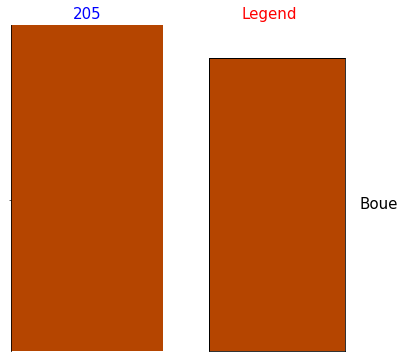

In [28]:
p.boreholes_3d[n].plot_log()

## 3D display of one borehole

In [29]:
p.boreholes_3d[n].plot_3d()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## 3D display of project boreholes

In [30]:
pause

NameError: name 'pause' is not defined

In [ ]:
p.plot_3d(repr_attribute='lithology', labels_size=15, bg_color=["royalblue", "aliceblue"], 
         window_size=(800, 600), verbose=True)